<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0, 0.5, 'Median Value of owner-occupied homes')

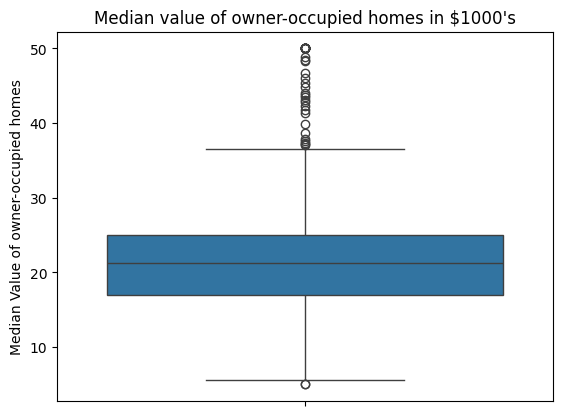

In [23]:
# Boxplot for Median value of owner occupied homes

ax = sns.boxplot(y='MEDV', data = boston_df)
plt.title("Median value of owner-occupied homes in $1000's")
plt.ylabel('Median Value of owner-occupied homes')

#  From the boxplot below we can see there are several outliers.
# The median value of owner-occupied homes is approximately $21,000. 

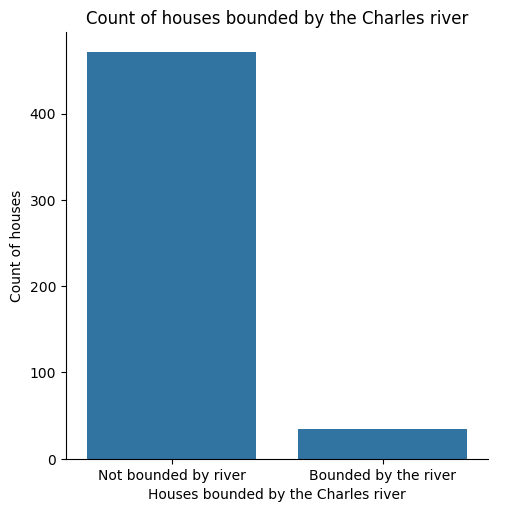

In [19]:
# Bar plot for the Charles river variable

ax = sns.catplot(kind='count', x='CHAS', data=boston_df, )
plt.title('Count of houses bounded by the Charles river')
plt.xlabel('Houses bounded by the Charles river')
plt.ylabel('Count of houses')
# for labels in the x axis: 0= houses not bounded by te river, 1= houses bound by the river) 
labels = ['Not bounded by river', 'Bounded by the river']
ax.set_xticklabels(labels)

# From the barplot below we can see that there is only a limited number of homes bounded by the Charles river.

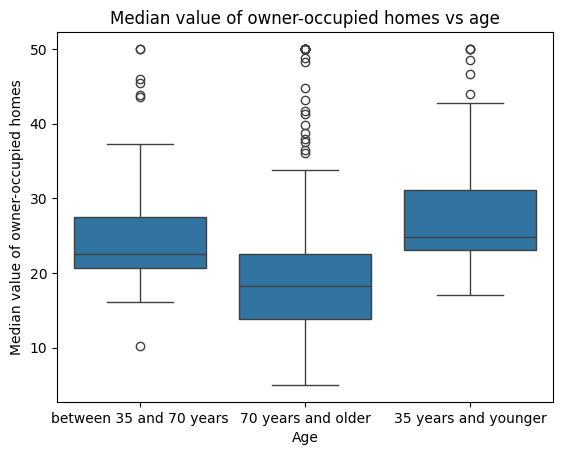

In [29]:
# Boxplot for the MEDV variable vs AGE , and Discretization of the age variable into three groups

# age discretization
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

# boxplot
sns.boxplot(data=boston_df, x ='age_group', y='MEDV')
plt.title('Median value of owner-occupied homes vs age')
plt.xlabel('Age')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

# From the boxplot below we can see that the Median value of owner-occupied homes does seem to vary with age, as the median home values 
# do exhibit relative differences as the age changes

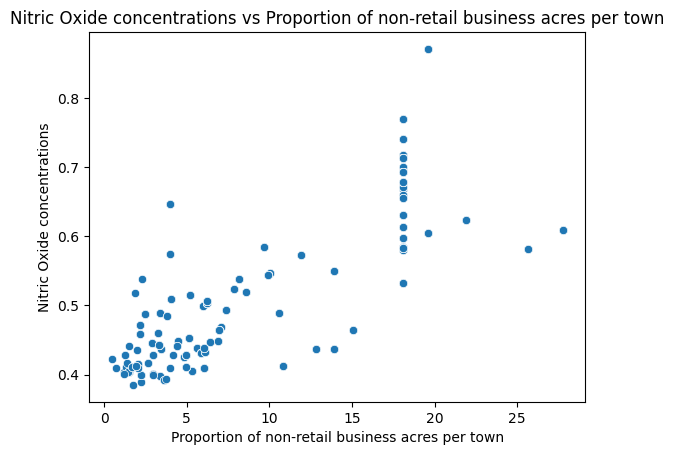

In [22]:
# SCatter plot between Nitric oxide concentrations and proportion of non-retail business acres per town 

sns.scatterplot(data = boston_df, x='INDUS', y ='NOX')
plt.title('Nitric Oxide concentrations vs Proportion of non-retail business acres per town')
plt.ylabel('Nitric Oxide concentrations')
plt.xlabel('Proportion of non-retail business acres per town')
plt.show()

# From the scatter plot below we can infer that there is a positive correlation between the Proportion of non-retail business acres per town
# and the Nitric Oxide concentrations

Text(0, 0.5, 'Frequency')

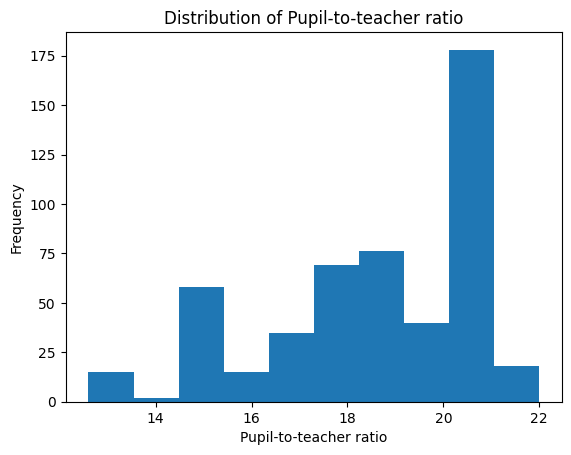

In [24]:
# Histogram for the Pupil-to-teacher ratio

plt.hist(boston_df['PTRATIO'])
plt.title('Distribution of Pupil-to-teacher ratio')
plt.xlabel('Pupil-to-teacher ratio')
plt.ylabel('Frequency')
plt.show()

# From the histogram below we can see that the most common Pupil-to-teacher ratio is approx. 21 students per teacher.

In [28]:
# ** HYPOTHESIS  TESTING **
# 1. T -test. Hypothesis statement:
# Ho: μ1 = μ2 : There is no significant difference in median value of houses bounded by the Charles river and those not bounded by the river
# H1: μ1 ≠ μ2 : There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the river
# a= 0.05

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']== 0 ]['MEDV'], boston_df[boston_df['CHAS']== 1 ]['MEDV']) # equal_var=True)

# Conclusion: The p-value is less than 0.05 that means we will reject the null hypothesis, as there is evidence that the median value of houses bounded by the Charles river 
# is significantly different than those not bounded by the river.


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [30]:
# 2. ANOVA. Hypothesis statement:

# Ho: μ1 = μ2 = μ3: There is no significant difference in median value of houses for each age group (proportion of owner-occupied units built prior to 1940)
# H1:  There is a significant difference in at least one of the median values 
#      (of houses for each proportion of owner-occupied units built prior to 1940)

# a= 0.05

thirtyfive_lower_medv = boston_df[boston_df['AGE'] <= 35]['MEDV'] 
thirtyfive_seventy_medv = boston_df[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70)]['MEDV']
seventy_older_medv = boston_df[boston_df['AGE'] >= 70]['MEDV'] 

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv)
print("F-statistic: {0} , P-value: {1}".format(f_statistic, p_value))

# Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis ,
# as there is significant evidence that at least one of the means differ.


F-statistic: 36.40764999196599 , P-value: 1.7105011022702984e-15


In [31]:
# 3. Pearson Correlation 
# Hypothesis statement:

# Ho : There is no correlation between Nitric Oxide concentrations and proportion of non-retail business acres 
# H1 : Nitric Oxide concentrations are correlated with proportion of non-retail business acres 
# a= 0.05

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Conclusion: Since the p-value is less than 0.05, we reject the Null hypothesis
# and conclude that there exists a relationship between Nitric Oxide concentrations and proportion of non-retail business acres

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [32]:
# 4. Regression analysis
# Hypothesis statement:

# Ho : There is no correlation between the weighted distances to the five Boston employment centers and the median value of owner-occupied homes
# H1 : The weighted distances to the five Boston employment centers are correlated to the median value of owner-occupied homes
# a= 0.05

# X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']

# add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#print out the model summary and statistics
model.summary()

# Conclusion: Since the p-value is less than 0.05, we reject the Null hypothesis
# and conclude that there exists a relationship between the weighted distances and the homes' median values.
# Also : The impact of an additional weighted distance will increase the homes' median value by 1.0916.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        00:40:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""